In [3]:
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install scikit-learn
!pip install datasets
!pip install matplotlib
!pip install pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 32.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 16.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 11.8 MB/s eta 0:00:0000:01
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (5.2 kB)
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached pyasn1-0.5.1-py2.py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 MB 6.1 MB/s eta 0:00:00:00:0100:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached astunparse-1.6

In [4]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from datasets import load_dataset
import random
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input




2024-11-12 12:31:32.005139: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/.venv/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df_path = '/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/metadata.csv'
df = pd.read_csv(df_path)

In [8]:
df

file_name  study_id   series_id  \
0     /Users/saminrazeghi/Documents/Samin/TMU/Semest...   4003253   702807833   
1     /Users/saminrazeghi/Documents/Samin/TMU/Semest...   4003253   702807833   
2     /Users/saminrazeghi/Documents/Samin/TMU/Semest...   4003253   702807833   
3     /Users/saminrazeghi/Documents/Samin/TMU/Semest...   4003253   702807833   
4     /Users/saminrazeghi/Documents/Samin/TMU/Semest...   4003253   702807833   
...                                                 ...       ...         ...   
6261  /Users/saminrazeghi/Documents/Samin/TMU/Semest...  26342422  2528347280   
6262  /Users/saminrazeghi/Documents/Samin/TMU/Semest...  26342422  2528347280   
6263  /Users/saminrazeghi/Documents/Samin/TMU/Semest...  26342422  2528347280   
6264  /Users/saminrazeghi/Documents/Samin/TMU/Semest...  26342422  2528347280   
6265  /Users/saminrazeghi/Documents/Samin/TMU/Semest...  26342422  2528347280   

      instance_number              condition  level           x           y  \
0                   8  Spinal Canal Stenosis  L1/L2  322.831858  227.964602   
1                   8  Spinal Canal Stenosis  L1/L2  322.831858  227.964602   
2                   8  Spinal Canal Stenosis  L1/L2  322.831858  227.964602   
3                   8  Spinal Canal Stenosis  L1/L2  322.831858  227.964602   
4                   8  Spinal Canal Stenosis  L1/L2  322.831858  227.964602   
...               ...                    ...    ...         ...         ...   
6261                9  Spinal Canal Stenosis  L5/S1  215.740072  266.685921   
6262                9  Spinal Canal Stenosis  L5/S1  215.740072  266.685921   
6263                9  Spinal Canal Stenosis  L5/S1  215.740072  266.685921   
6264                9  Spinal Canal Stenosis  L5/S1  215.740072  266.685921   
6265                9  Spinal Canal Stenosis  L5/S1  215.740072  266.685921   

     condition_level_value  
0              Normal/Mild  
1              Normal/Mild  
2              Normal/Mild  
3              Normal/Mild  
4              Normal/Mild  
...                    ...  
6261           Normal/Mild  
6262           Normal/Mild  
6263           Normal/Mild  
6264           Normal/Mild  
6265           Normal/Mild  

[6266 rows x 9 columns]

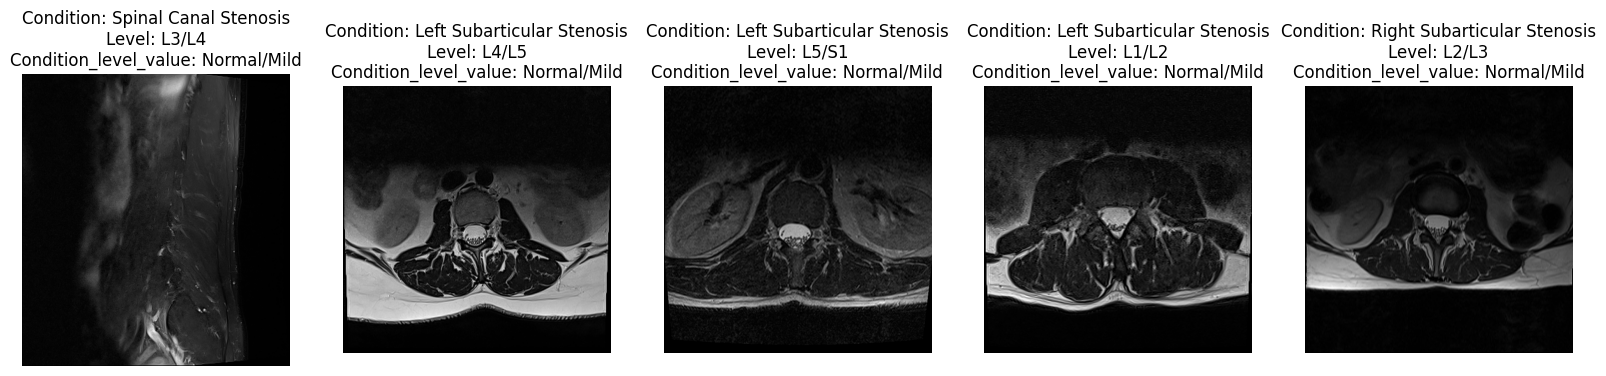

In [10]:
# Sample 5 random rows from the merged_df3 dataframe
sampled_df = df.sample(n=5, random_state=42)

# Create a plot to display the images
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# Loop through each sampled row
for i, (index, row) in enumerate(sampled_df.iterrows()):
    # Load the image using PIL
    image = Image.open(row['file_name'])

    # Display the image on the corresponding axis
    axes[i].imshow(image)
    axes[i].axis('off')

    # Display the condition as the label
    axes[i].set_title(f"Condition: {row['condition']}\nLevel: {row['level']}\nCondition_level_value: {row['condition_level_value']}")

plt.show()

# First try

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

In [13]:
# Define a function to preprocess the images
def preprocess_image(image_path, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # EfficientNet preprocessing
    return img_array

In [14]:
# Example of processing and passing images through the EfficientNet model
model = EfficientNetB0(weights='imagenet')  # Load pre-trained EfficientNetB0

2024-11-12 13:07:54.162290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


21834768/21834768 [==============================] - 1s 0us/step


In [16]:
# Get a random sample from merged_df3
sampled_df = df.sample(n=5, random_state=42)


In [17]:
# Prepare images and labels
images = []
labels = []
for _, row in sampled_df.iterrows():
    image_path = row['file_name']
    # Preprocess image
    img_array = preprocess_image(image_path)
    images.append(img_array)
    labels.append(row['condition'])  # Assuming 'condition' is the label

In [18]:
# Stack all images into a single array
images = np.vstack(images)

In [19]:
# If needed, you can one-hot encode the labels, for now, let's print them
print("Labels for these images:", labels)

Labels for these images: ['Spinal Canal Stenosis', 'Left Subarticular Stenosis', 'Left Subarticular Stenosis', 'Left Subarticular Stenosis', 'Right Subarticular Stenosis']


In [20]:
# Predict using EfficientNet
predictions = model.predict(images)

1/1 [==============================] - 2s 2s/step


In [21]:
# Print predictions (e.g., class probabilities)
print("Predictions: \n", predictions)

Predictions: 
 [[1.7757918e-04 5.3829269e-04 4.3859361e-03 ... 8.0596001e-05
  5.3218170e-04 2.6880654e-03]
 [2.1978543e-05 6.6575834e-05 2.4316327e-04 ... 1.7001998e-05
  2.0824193e-05 3.7226020e-04]
 [6.4458778e-05 5.1520812e-05 6.4368511e-04 ... 9.9211140e-04
  5.9514536e-05 2.5366817e-03]
 [4.6397228e-05 5.6641302e-06 1.3583474e-04 ... 1.8142344e-04
  3.9369723e-05 1.4499959e-04]
 [7.2452167e-05 8.3616462e-05 1.1318822e-03 ... 5.3038540e-05
  7.4707576e-05 1.7679640e-03]]


# Multi-Label Classification

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input


In [ ]:
# Step 1: Extract images and labels from `merged_df3`
image_paths = df['file_name'].values  # List of image paths
conditions = df['condition'].values  # List of condition labels (for classification)
xy_labels = df[['x', 'y']].values  # List of x and y labels (for regression)

In [24]:
# Step 2: Load and preprocess images
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to 224x224
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return preprocess_input(img_array)  # Normalize the image

In [25]:
# Load and preprocess images
X_images = np.vstack([load_and_preprocess_image(img_path) for img_path in image_paths])

In [ ]:
# Step 3: Encode the conditions (you can use one-hot encoding for classification)
# Assuming 'condition' is a categorical variable, apply one-hot encoding
conditions_encoded = pd.get_dummies(conditions).values  # One-hot encode the 'condition' labels

In [27]:
# Step 4: Prepare the targets (regression for x and y)
y_regression = xy_labels  # Already in the correct format for regression (x, y)

In [28]:
# Step 5: Build the EfficientNet model (same as before, with multi-output)
input_image = tf.keras.Input(shape=(224, 224, 3))

backbone = EfficientNetB0(include_top=False, input_tensor=input_image, weights='imagenet')
backbone.trainable = False  # Freeze the backbone

x = tf.keras.layers.GlobalAveragePooling2D()(backbone.output)

16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
# Multi-output model: Classification (condition) and Regression (x, y)
condition_output = tf.keras.layers.Dense(conditions_encoded.shape[1], activation='softmax', name='condition')(x)
xy_output = tf.keras.layers.Dense(2, name='xy')(x)  # Two outputs for x and y

In [ ]:
model = tf.keras.Model(inputs=input_image, outputs=[condition_output, xy_output])

In [31]:
# Compile the model with different loss functions for each task
model.compile(
    optimizer='adam',
    loss={
        'condition': 'categorical_crossentropy',  # For classification task
        'xy': 'mean_squared_error'  # For regression task
    },
    metrics={'condition': 'accuracy', 'xy': 'mse'}
)

In [32]:
# Step 6: Train the model
history = model.fit(
    X_images,  # Input images
    {'condition': conditions_encoded, 'xy': y_regression},  # Targets
    epochs=10,
    batch_size=32
)

Epoch 1/10
196/196 [==============================] - 228s 1s/step - loss: 39307.2539 - condition_loss: 0.7679 - xy_loss: 39306.4805 - condition_accuracy: 0.5385 - xy_mse: 39306.4805
Epoch 2/10
196/196 [==============================] - 236s 1s/step - loss: 26063.6289 - condition_loss: 0.6596 - xy_loss: 26062.9766 - condition_accuracy: 0.5827 - xy_mse: 26062.9766
Epoch 3/10
196/196 [==============================] - 231s 1s/step - loss: 17308.1113 - condition_loss: 0.6316 - xy_loss: 17307.4863 - condition_accuracy: 0.5886 - xy_mse: 17307.4863
Epoch 4/10
196/196 [==============================] - 229s 1s/step - loss: 11764.5020 - condition_loss: 0.6182 - xy_loss: 11763.8887 - condition_accuracy: 0.5980 - xy_mse: 11763.8887
Epoch 5/10
196/196 [==============================] - 236s 1s/step - loss: 8436.7939 - condition_loss: 0.6103 - xy_loss: 8436.1797 - condition_accuracy: 0.5929 - xy_mse: 8436.1797
Epoch 6/10
196/196 [==============================] - 241s 1s/step - loss: 6471.0723 - c

# plots:

In [ ]:
import matplotlib.pyplot as plt

# Step 2: Plot learning curves
# Plot Losses
plt.figure(figsize=(14, 6))

# Loss for 'condition'
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Total Loss', color='blue')
plt.plot(history.history['condition_loss'], label='Condition Loss', color='orange')
plt.plot(history.history['xy_loss'], label='XY Loss', color='green')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Loss for 'condition_level_value' and accuracy for classification
plt.subplot(1, 2, 2)
plt.plot(history.history['condition_accuracy'], label='Condition Accuracy', color='purple')
plt.plot(history.history['xy_loss'], label='XY Loss', color='red')  # Regression loss
plt.title('Accuracy and Loss for Classification and Regression')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Test the model

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [35]:
# Number of examples to plot
num_examples = 5

# Randomly select 5 indices for the examples to plot
random_indices = random.sample(range(len(X_images)), num_examples)

# Make predictions on the images
predictions = model.predict(X_images)

# Extract the predicted values
condition_preds = predictions[0]  # Predicted class probabilities for 'condition'
xy_preds = predictions[1]  # Predicted (x, y) regression values

# Convert predicted probabilities to labels for classification tasks (condition)
condition_pred_labels = np.argmax(condition_preds, axis=1)


196/196 [==============================] - 201s 1s/step


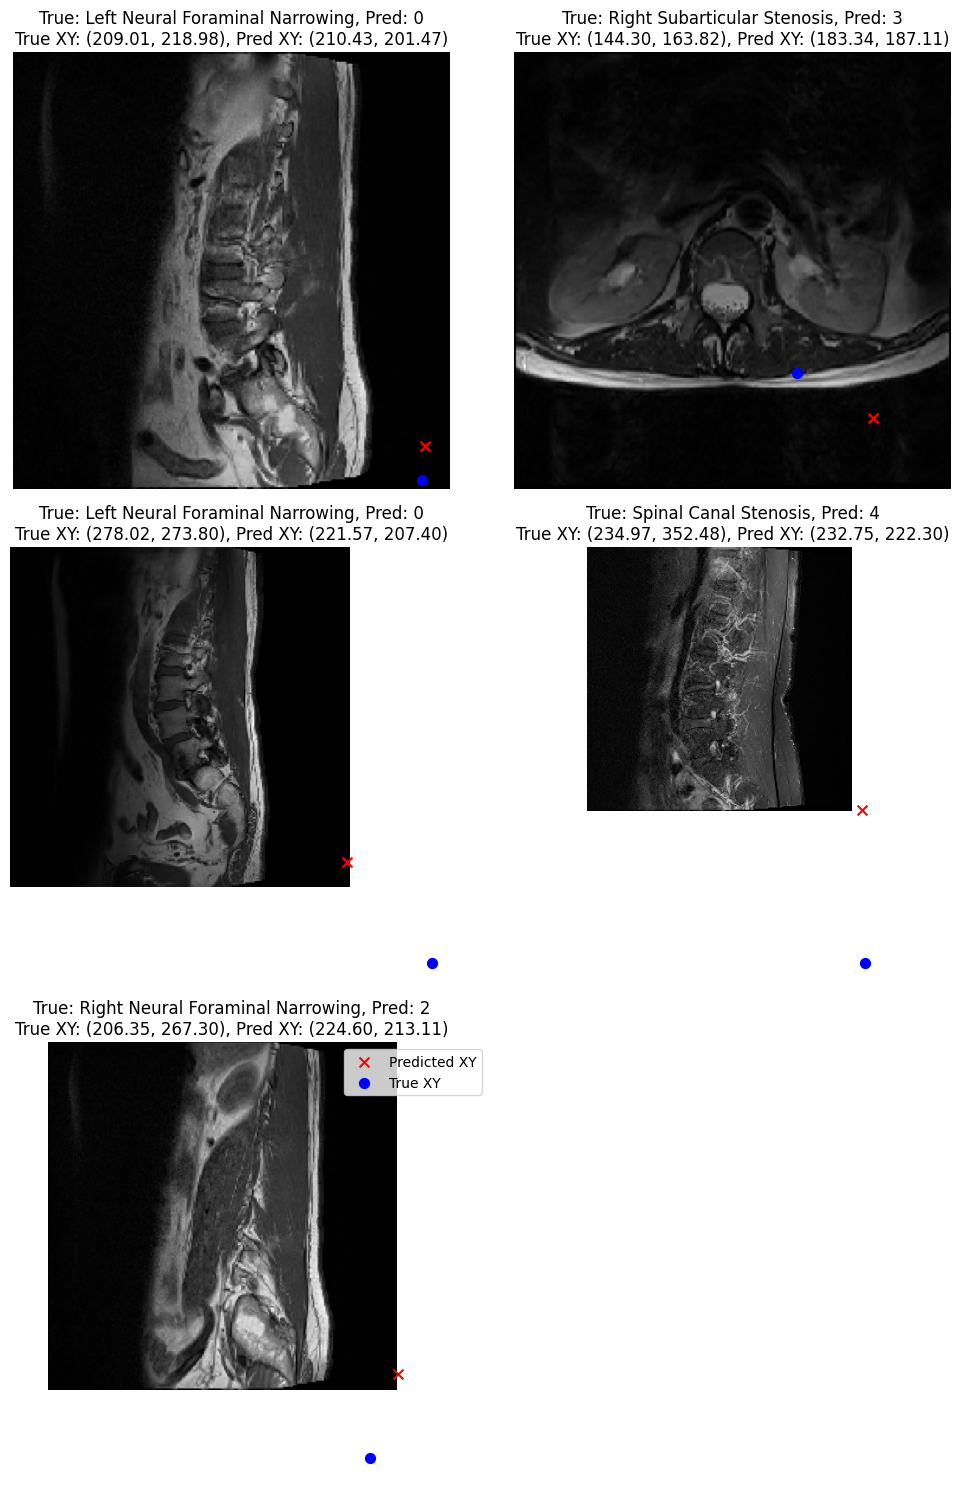

In [39]:
# Determine the number of rows needed for 2 images per row
num_rows = (num_examples + 1) // 2
# Plot the random examples with the actual and predicted labels
plt.figure(figsize=(10, num_rows * 5))
for i, idx in enumerate(random_indices):
    plt.subplot(num_rows, 2, i + 1)  # Arrange in rows of 2 images each
    
    # Get the image directly
    img = X_images[idx]  # X_images has shape (batch_size, 224, 224, 3)
    plt.imshow(img.astype('uint8'))  # Convert the image to uint8 for display
    plt.axis('off')  # Hide axes
    
    # Get true labels
    true_condition = conditions[idx]
    true_xy = y_regression[idx]
    
    # Get predicted labels and values
    predicted_condition = condition_pred_labels[idx]
    predicted_xy = xy_preds[idx]
    
    # Display the actual and predicted labels on the plot
    plt.title(f"True: {true_condition}, Pred: {predicted_condition}\n"
              f"True XY: ({true_xy[0]:.2f}, {true_xy[1]:.2f}), Pred XY: ({predicted_xy[0]:.2f}, {predicted_xy[1]:.2f})")
    
    # Overlay the regression points (x, y) on the image
    plt.scatter(predicted_xy[0], predicted_xy[1], color='red', label='Predicted XY', s=50, marker='x')
    plt.scatter(true_xy[0], true_xy[1], color='blue', label='True XY', s=50, marker='o')

# Add a single legend for the plot (outside the loop)
plt.legend(['Predicted XY', 'True XY'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


# Multi-Label (3) Classification

In [40]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input


In [41]:
# Step 1: Extract images and labels from `merged_df3`
image_paths = df['file_name'].values  # List of image paths
conditions = df['condition'].values  # List of condition labels (for classification)
xy_labels = df[['x', 'y']].values  # List of x and y labels (for regression)
condition_level_value = df['condition_level_value'].values  # List of condition level values

In [42]:
# Step 2: Load and preprocess images
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to 224x224
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return preprocess_input(img_array)  # Normalize the image

In [43]:
# Load and preprocess images
X_images = np.vstack([load_and_preprocess_image(img_path) for img_path in image_paths])

In [44]:
# Step 3: Encode the conditions (you can use one-hot encoding for classification)
# Assuming 'condition' is a categorical variable, apply one-hot encoding
conditions_encoded = pd.get_dummies(conditions).values  # One-hot encode the 'condition' labels
condition_level_value_encoded = pd.get_dummies(condition_level_value).values  # One-hot encode the 'condition_level_value' labels

In [45]:
# Step 4: Prepare the targets (regression for x and y)
y_regression = xy_labels  # Already in the correct format for regression (x, y)

In [46]:
# Step 5: Build the EfficientNet model (with 4 outputs: condition, condition_level_value, and regression for x and y)
input_image = tf.keras.Input(shape=(224, 224, 3))

backbone = EfficientNetB0(include_top=False, input_tensor=input_image, weights='imagenet')
backbone.trainable = False  # Freeze the backbone

x = tf.keras.layers.GlobalAveragePooling2D()(backbone.output)

In [47]:
# Multi-output model: Classification (condition), Classification (condition_level_value), and Regression (x, y)
condition_output = tf.keras.layers.Dense(conditions_encoded.shape[1], activation='softmax', name='condition')(x)
condition_level_value_output = tf.keras.layers.Dense(condition_level_value_encoded.shape[1], activation='softmax', name='condition_level_value')(x)  # New output
xy_output = tf.keras.layers.Dense(2, name='xy')(x)  # Two outputs for x and y

In [48]:
model = tf.keras.Model(inputs=input_image, outputs=[condition_output, condition_level_value_output, xy_output])

In [49]:
# Step 6: Compile the model with different loss functions for each task
model.compile(
    optimizer='adam',
    loss={
        'condition': 'categorical_crossentropy',  # For classification task (condition)
        'condition_level_value': 'categorical_crossentropy',  # For classification task (condition_level_value)
        'xy': 'mean_squared_error'  # For regression task (x, y)
    },
    metrics={'condition': 'accuracy', 'condition_level_value': 'accuracy', 'xy': 'mse'}
)

In [50]:
# Step 7: Train the model
history = model.fit(
    X_images,  # Input images
    {
        'condition': conditions_encoded, 
        'condition_level_value': condition_level_value_encoded,  # New target for condition_level_value
        'xy': y_regression  # Targets for x and y (regression)
    },
    epochs=10,
    batch_size=32
)

Epoch 1/10
196/196 [==============================] - 258s 1s/step - loss: 39450.0820 - condition_loss: 0.7769 - condition_level_value_loss: 0.5185 - xy_loss: 39448.7852 - condition_accuracy: 0.5373 - condition_level_value_accuracy: 0.8069 - xy_mse: 39448.7852
Epoch 2/10
196/196 [==============================] - 248s 1s/step - loss: 26147.0176 - condition_loss: 0.6679 - condition_level_value_loss: 0.4701 - xy_loss: 26145.8848 - condition_accuracy: 0.5741 - condition_level_value_accuracy: 0.8048 - xy_mse: 26145.8848
Epoch 3/10
196/196 [==============================] - 240s 1s/step - loss: 17319.2070 - condition_loss: 0.6331 - condition_level_value_loss: 0.4581 - xy_loss: 17318.1152 - condition_accuracy: 0.5954 - condition_level_value_accuracy: 0.8104 - xy_mse: 17318.1152
Epoch 4/10
196/196 [==============================] - 260s 1s/step - loss: 11763.0117 - condition_loss: 0.6171 - condition_level_value_loss: 0.4562 - xy_loss: 11761.9404 - condition_accuracy: 0.6012 - condition_level_

# Plot the result:

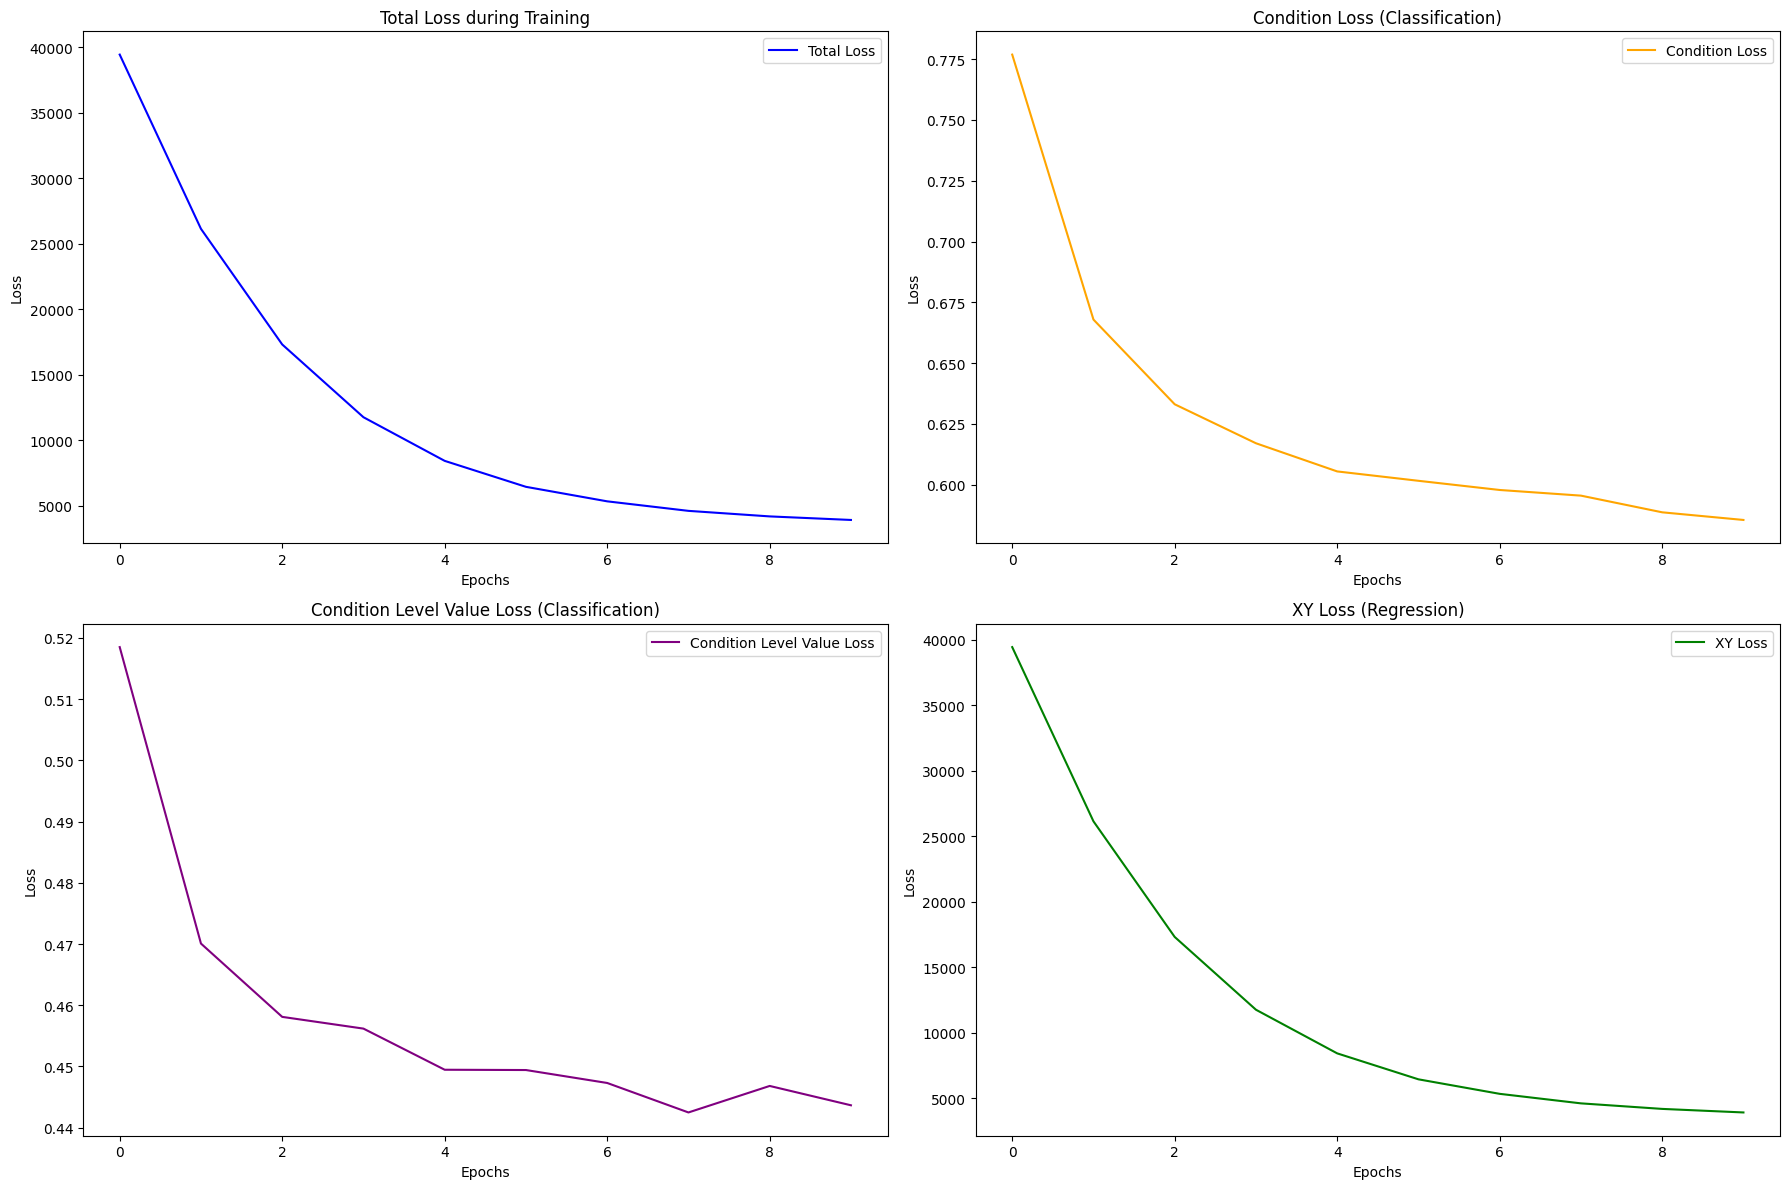

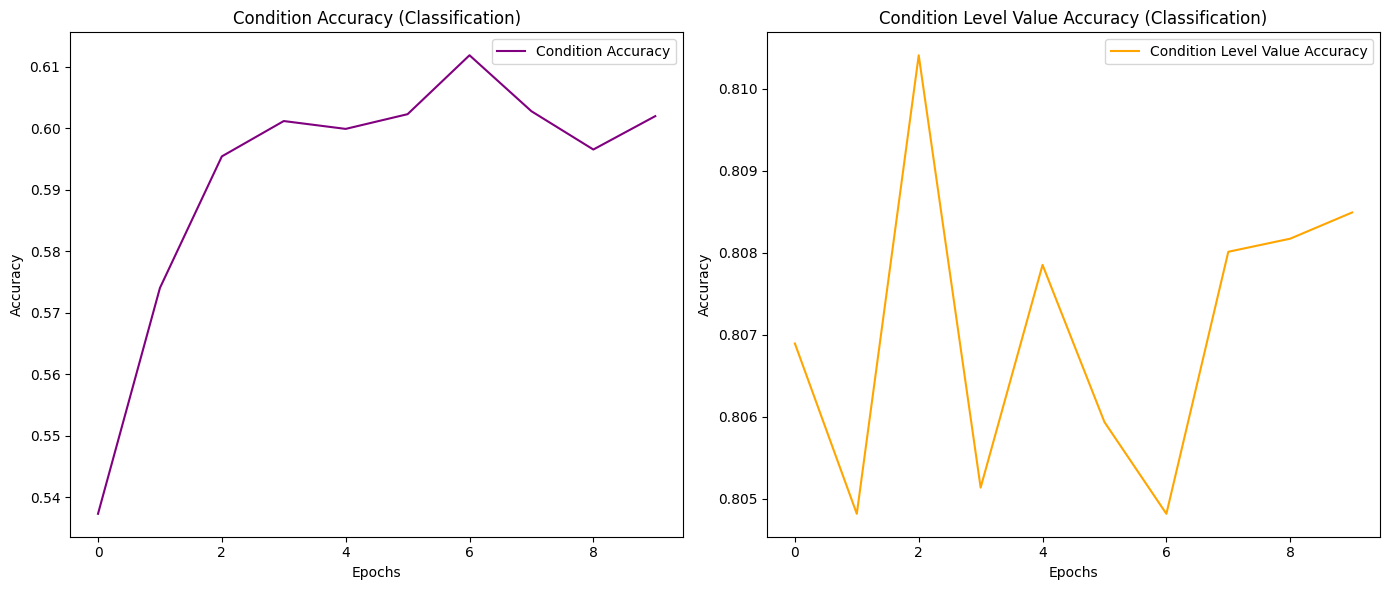

In [52]:
import matplotlib.pyplot as plt

# Plotting each loss and accuracy metric separately
plt.figure(figsize=(18, 12))

# Plot the total loss over epochs
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Total Loss', color='blue')
plt.title('Total Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot condition loss (classification task)
plt.subplot(2, 2, 2)
plt.plot(history.history['condition_loss'], label='Condition Loss', color='orange')
plt.title('Condition Loss (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot condition level value loss (classification task)
plt.subplot(2, 2, 3)
plt.plot(history.history['condition_level_value_loss'], label='Condition Level Value Loss', color='purple')
plt.title('Condition Level Value Loss (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot xy loss (regression task)
plt.subplot(2, 2, 4)
plt.plot(history.history['xy_loss'], label='XY Loss', color='green')
plt.title('XY Loss (Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Accuracy plots for classification tasks
plt.figure(figsize=(14, 6))

# Plot condition accuracy (classification)
plt.subplot(1, 2, 1)
plt.plot(history.history['condition_accuracy'], label='Condition Accuracy', color='purple')
plt.title('Condition Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot condition level value accuracy (classification)
plt.subplot(1, 2, 2)
plt.plot(history.history['condition_level_value_accuracy'], label='Condition Level Value Accuracy', color='orange')
plt.title('Condition Level Value Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Test:

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [54]:
# Number of examples to plot
num_examples = 5

# Randomly select 5 indices for the examples to plot
random_indices = random.sample(range(len(X_images)), num_examples)

# Make predictions on the images
predictions = model.predict(X_images)

# Extract the predicted values
condition_preds = predictions[0]  # Predicted class probabilities for 'condition'
xy_preds = predictions[1]  # Predicted (x, y) regression values

# Convert predicted probabilities to labels for classification tasks (condition)
condition_pred_labels = np.argmax(condition_preds, axis=1)


196/196 [==============================] - 229s 1s/step


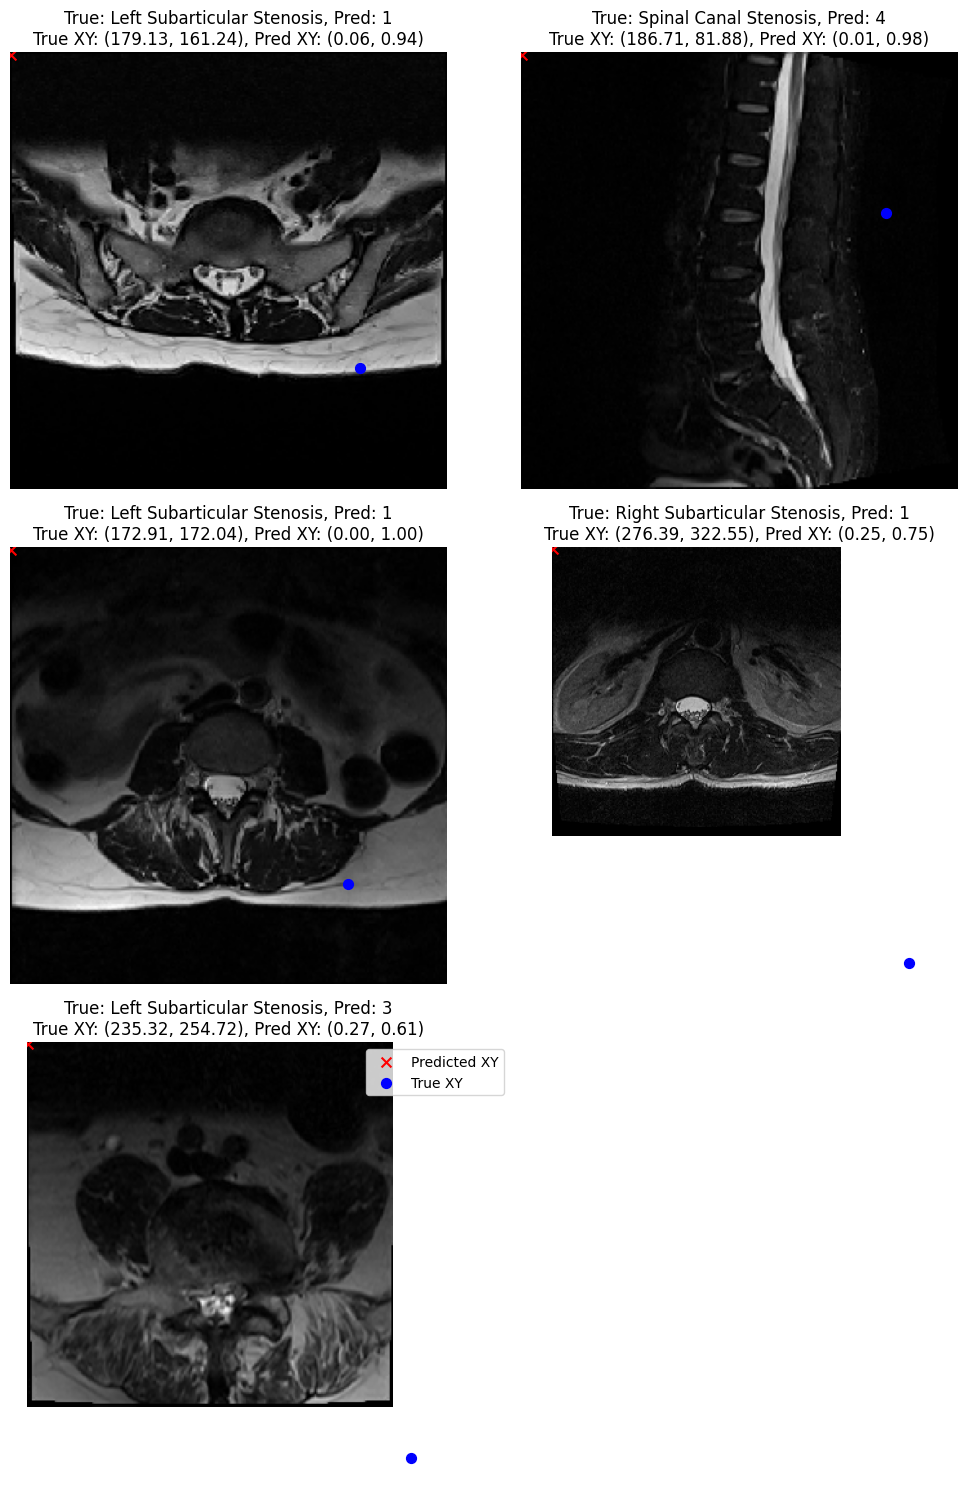

In [55]:
# Determine the number of rows needed for 2 images per row
num_rows = (num_examples + 1) // 2
# Plot the random examples with the actual and predicted labels
plt.figure(figsize=(10, num_rows * 5))
for i, idx in enumerate(random_indices):
    plt.subplot(num_rows, 2, i + 1)  # Arrange in rows of 2 images each
    
    # Get the image directly
    img = X_images[idx]  # X_images has shape (batch_size, 224, 224, 3)
    plt.imshow(img.astype('uint8'))  # Convert the image to uint8 for display
    plt.axis('off')  # Hide axes
    
    # Get true labels
    true_condition = conditions[idx]
    true_xy = y_regression[idx]
    
    # Get predicted labels and values
    predicted_condition = condition_pred_labels[idx]
    predicted_xy = xy_preds[idx]
    
    # Display the actual and predicted labels on the plot
    plt.title(f"True: {true_condition}, Pred: {predicted_condition}\n"
              f"True XY: ({true_xy[0]:.2f}, {true_xy[1]:.2f}), Pred XY: ({predicted_xy[0]:.2f}, {predicted_xy[1]:.2f})")
    
    # Overlay the regression points (x, y) on the image
    plt.scatter(predicted_xy[0], predicted_xy[1], color='red', label='Predicted XY', s=50, marker='x')
    plt.scatter(true_xy[0], true_xy[1], color='blue', label='True XY', s=50, marker='o')

# Add a single legend for the plot (outside the loop)
plt.legend(['Predicted XY', 'True XY'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Decode function for one-hot encoded predictions
def decode_one_hot(encoded_array, original_labels):
    indices = np.argmax(encoded_array, axis=1)  # Find index of max value in each one-hot vector
    return [original_labels[i] for i in indices]  # Map indices back to original labels

# Original label lists for decoding
unique_conditions = list(pd.get_dummies(conditions).columns)  # Unique condition labels
unique_condition_levels = list(pd.get_dummies(condition_level_value).columns)  # Unique condition level labels

# Assuming `model.predict()` gives a list of arrays for each output
# Perform predictions
predictions = model.predict(X_images)
condition_preds = predictions[0]  # Condition predictions
condition_level_value_preds = predictions[1]  # Condition level value predictions
xy_preds = predictions[2]  # XY predictions for regression

# Decode predictions
decoded_condition_preds = decode_one_hot(condition_preds, unique_conditions)
decoded_condition_level_preds = decode_one_hot(condition_level_value_preds, unique_condition_levels)


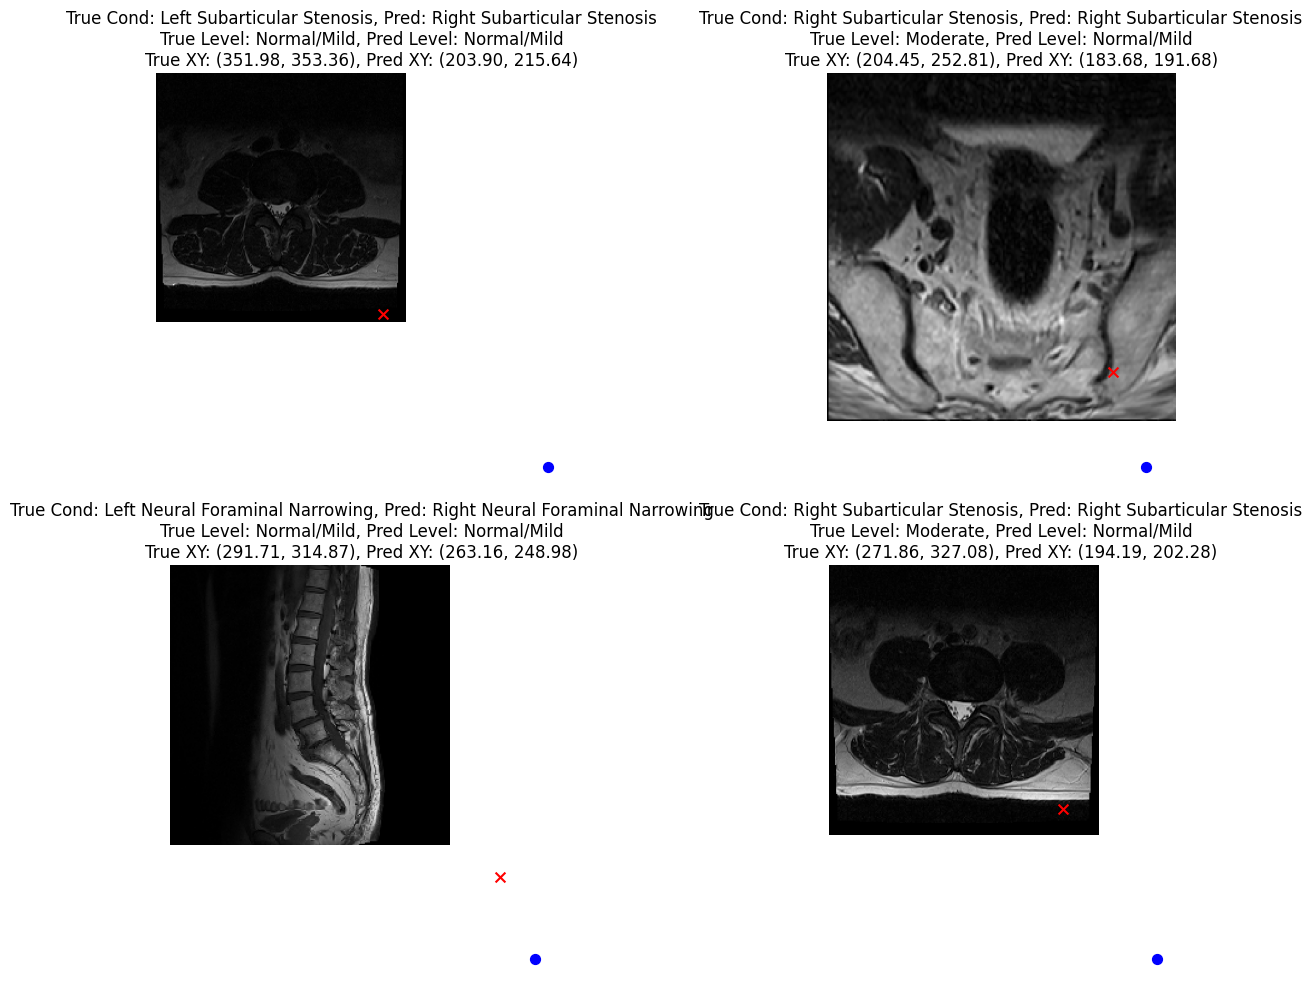

In [57]:
plt.figure(figsize=(15, 10))
num_examples = 4  # Number of images to display
random_indices = np.random.choice(len(X_images), num_examples, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(2, num_examples // 2, i + 1)
    
    # Display the image
    img = X_images[idx]
    plt.imshow(img.astype('uint8'))
    plt.axis('off')

    # True labels
    true_condition = conditions[idx]
    true_condition_level = condition_level_value[idx]
    true_xy = y_regression[idx]

    # Predicted labels
    predicted_condition = decoded_condition_preds[idx]
    predicted_condition_level = decoded_condition_level_preds[idx]
    predicted_xy = xy_preds[idx]

    # Display labels in the title
    plt.title(f"True Cond: {true_condition}, Pred: {predicted_condition}\n"
              f"True Level: {true_condition_level}, Pred Level: {predicted_condition_level}\n"
              f"True XY: ({true_xy[0]:.2f}, {true_xy[1]:.2f}), Pred XY: ({predicted_xy[0]:.2f}, {predicted_xy[1]:.2f})")
    
    # Optionally: Overlay predicted and true XY points
    plt.scatter(predicted_xy[0], predicted_xy[1], color='red', label='Predicted XY', s=50, marker='x')
    plt.scatter(true_xy[0], true_xy[1], color='blue', label='True XY', s=50, marker='o')

plt.tight_layout()
plt.show()

# Second try****************:

In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
import random

In [60]:
# Load Data
image_paths = df['file_name'].values  # List of image paths
conditions = df['condition'].values  # List of condition labels
xy_labels = df[['x', 'y']].values  # x and y regression labels
condition_level_value = df['condition_level_value'].values  # condition level values

In [61]:
# Split data into train and test sets
train_paths, val_paths, train_conditions, val_conditions, train_xy, val_xy, train_condition_level, val_condition_level = train_test_split(
    image_paths, conditions, xy_labels, condition_level_value, test_size=0.2, random_state=42
)

In [62]:
# Step 2: Load and preprocess images
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)


In [63]:
# Preprocess images for train and validation sets
X_train = np.vstack([load_and_preprocess_image(img) for img in train_paths])
X_val = np.vstack([load_and_preprocess_image(img) for img in val_paths])

In [64]:
# Encode condition labels
train_conditions_encoded = pd.get_dummies(train_conditions).values
val_conditions_encoded = pd.get_dummies(val_conditions).values

train_condition_level_encoded = pd.get_dummies(train_condition_level).values
val_condition_level_encoded = pd.get_dummies(val_condition_level).values

In [65]:
# Step 3: Build the model
input_image = tf.keras.Input(shape=(224, 224, 3))

backbone = EfficientNetB0(include_top=False, input_tensor=input_image, weights='imagenet')
backbone.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(backbone.output)

condition_output = tf.keras.layers.Dense(train_conditions_encoded.shape[1], activation='softmax', name='condition')(x)
condition_level_value_output = tf.keras.layers.Dense(train_condition_level_encoded.shape[1], activation='softmax', name='condition_level_value')(x)
xy_output = tf.keras.layers.Dense(2, name='xy')(x)

model = tf.keras.Model(inputs=input_image, outputs=[condition_output, condition_level_value_output, xy_output])

In [66]:
# Compile the model
model.compile(
    optimizer='adam',
    loss={'condition': 'categorical_crossentropy', 'condition_level_value': 'categorical_crossentropy', 'xy': 'mean_squared_error'},
    metrics={'condition': 'accuracy', 'condition_level_value': 'accuracy', 'xy': 'mse'}
)

In [67]:
# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [68]:
# Step 4: Train the model
history = model.fit(
    X_train,
    {'condition': train_conditions_encoded, 'condition_level_value': train_condition_level_encoded, 'xy': train_xy},
    validation_data=(X_val, {'condition': val_conditions_encoded, 'condition_level_value': val_condition_level_encoded, 'xy': val_xy}),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/10
157/157 [==============================] - 253s 2s/step - loss: 41096.0117 - condition_loss: 0.8077 - condition_level_value_loss: 0.5500 - xy_loss: 41094.6328 - condition_accuracy: 0.5263 - condition_level_value_accuracy: 0.7965 - xy_mse: 41094.6328 - val_loss: 34217.2148 - val_condition_loss: 0.6945 - val_condition_level_value_loss: 0.4717 - val_xy_loss: 34216.0547 - val_condition_accuracy: 0.5566 - val_condition_level_value_accuracy: 0.8325 - val_xy_mse: 34216.0547
Epoch 2/10
157/157 [==============================] - 233s 1s/step - loss: 29635.3750 - condition_loss: 0.6651 - condition_level_value_loss: 0.4821 - xy_loss: 29634.2188 - condition_accuracy: 0.5826 - condition_level_value_accuracy: 0.8081 - xy_mse: 29634.2188 - val_loss: 24379.3691 - val_condition_loss: 0.6568 - val_condition_level_value_loss: 0.4424 - val_xy_loss: 24378.2734 - val_condition_accuracy: 0.5662 - val_condition_level_value_accuracy: 0.8206 - val_xy_mse: 24378.2734
Epoch 3/10
157/157 [==============

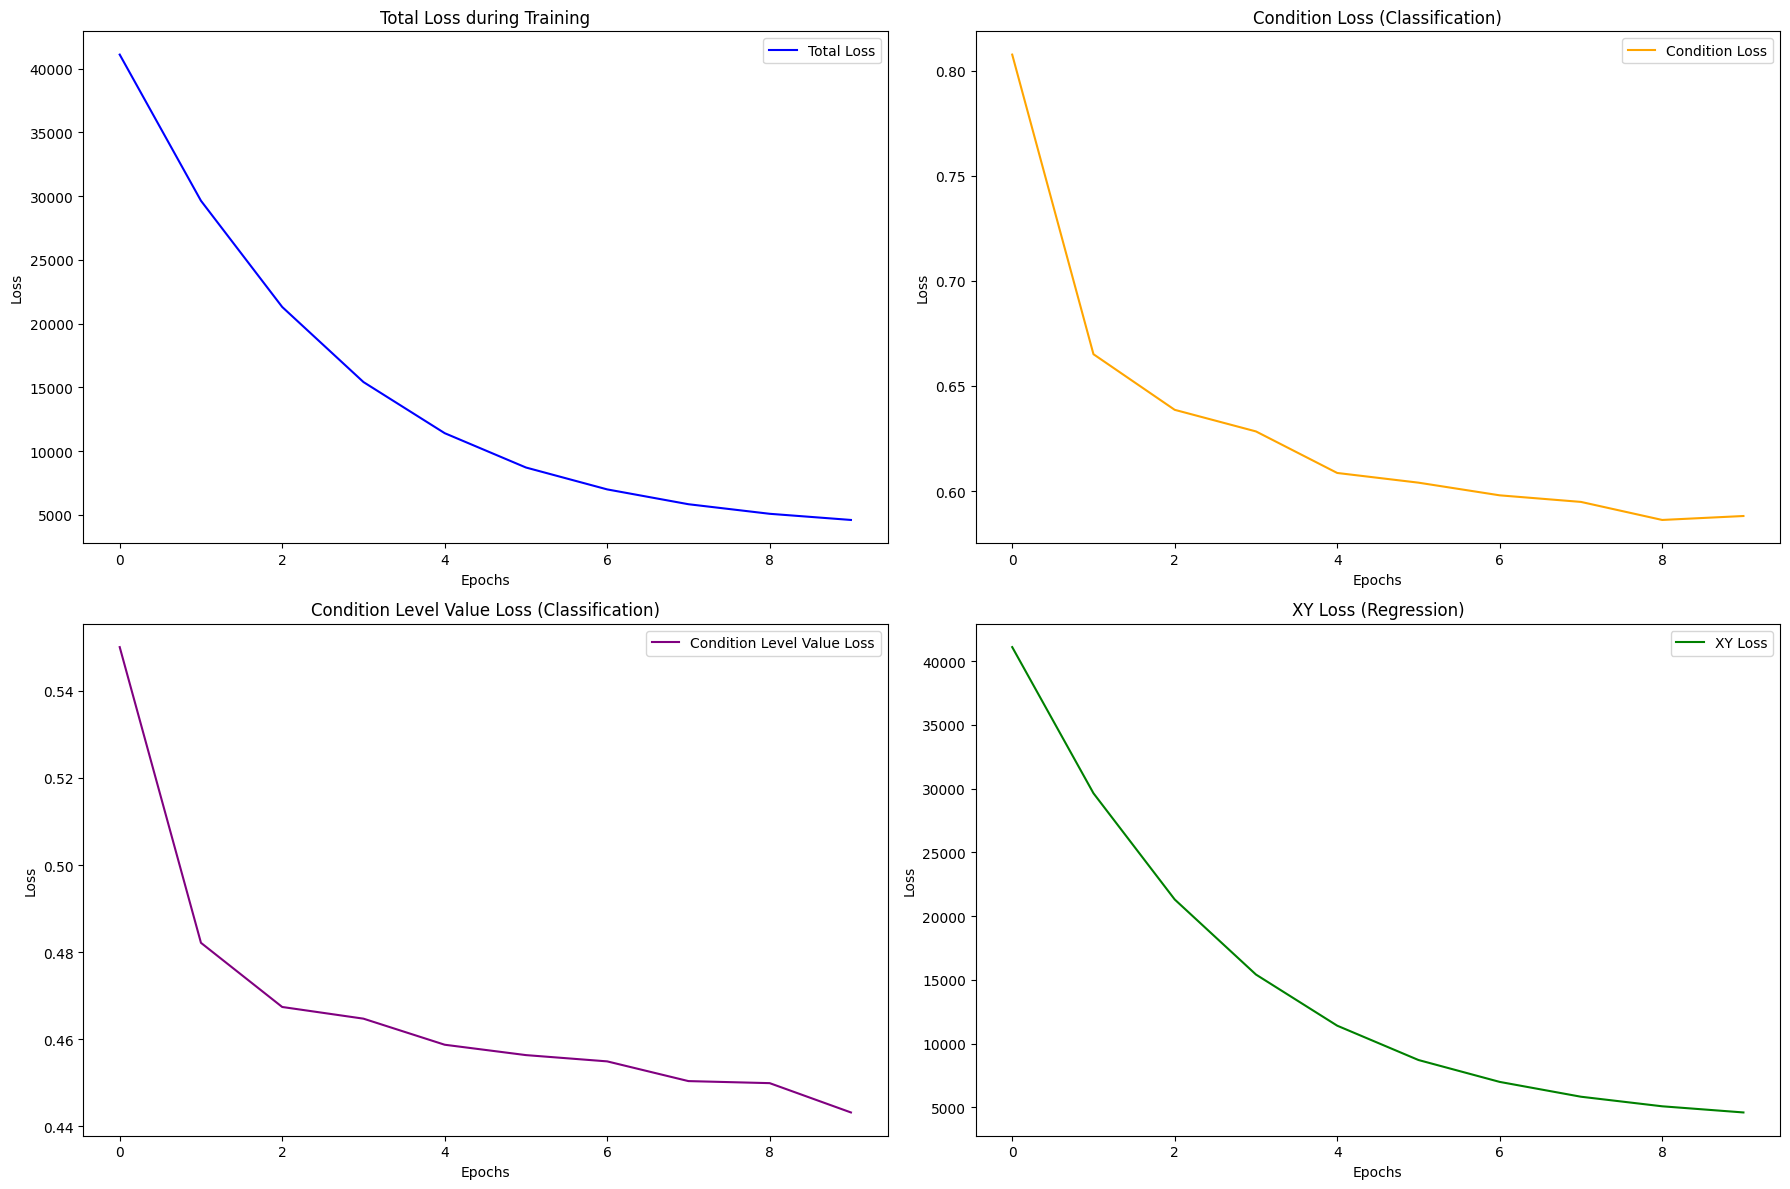

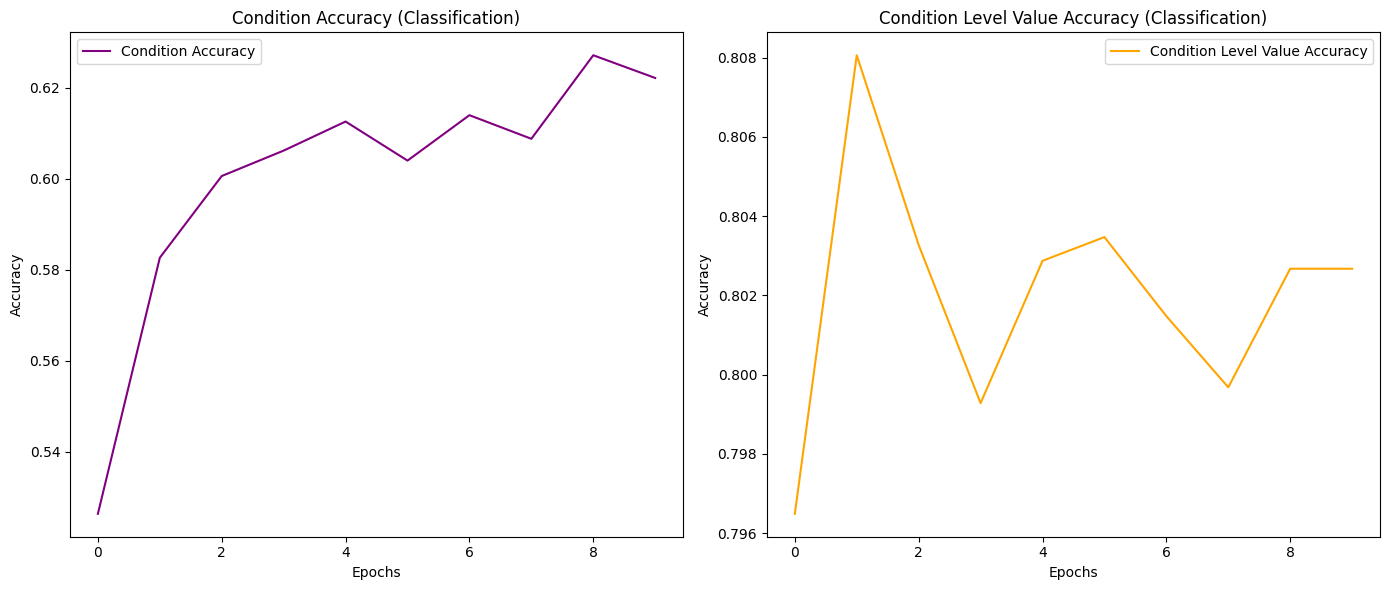

In [69]:
import matplotlib.pyplot as plt

# Plotting each loss and accuracy metric separately
plt.figure(figsize=(18, 12))

# Plot the total loss over epochs
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Total Loss', color='blue')
plt.title('Total Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot condition loss (classification task)
plt.subplot(2, 2, 2)
plt.plot(history.history['condition_loss'], label='Condition Loss', color='orange')
plt.title('Condition Loss (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot condition level value loss (classification task)
plt.subplot(2, 2, 3)
plt.plot(history.history['condition_level_value_loss'], label='Condition Level Value Loss', color='purple')
plt.title('Condition Level Value Loss (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot xy loss (regression task)
plt.subplot(2, 2, 4)
plt.plot(history.history['xy_loss'], label='XY Loss', color='green')
plt.title('XY Loss (Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Accuracy plots for classification tasks
plt.figure(figsize=(14, 6))

# Plot condition accuracy (classification)
plt.subplot(1, 2, 1)
plt.plot(history.history['condition_accuracy'], label='Condition Accuracy', color='purple')
plt.title('Condition Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot condition level value accuracy (classification)
plt.subplot(1, 2, 2)
plt.plot(history.history['condition_level_value_accuracy'], label='Condition Level Value Accuracy', color='orange')
plt.title('Condition Level Value Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [70]:
# Step 6: Evaluate model on validation data
eval_results = model.evaluate(X_val, {'condition': val_conditions_encoded, 'condition_level_value': val_condition_level_encoded, 'xy': val_xy})
print(f"Evaluation on Validation Data: {eval_results}")

40/40 [==============================] - 43s 1s/step - loss: 4262.0635 - condition_loss: 0.6406 - condition_level_value_loss: 0.4493 - xy_loss: 4260.9741 - condition_accuracy: 0.5774 - condition_level_value_accuracy: 0.8301 - xy_mse: 4260.9741
Evaluation on Validation Data: [4262.0634765625, 0.6405895352363586, 0.44925886392593384, 4260.97412109375, 0.5773524641990662, 0.8301435112953186, 4260.97412109375]


In [75]:
# Step 7: Show a few random images with true and predicted labels
num_examples = 4
random_indices = random.sample(range(len(X_val)), num_examples)
predictions = model.predict(X_val)

condition_preds = predictions[0]  # Predicted class probabilities for 'condition'
condition_level_value_preds = predictions[1]  # Predicted class probabilities for 'condition_level_value'
xy_preds = predictions[2]  # Predicted (x, y) values

condition_pred_labels = np.argmax(condition_preds, axis=1)
condition_level_value_pred_labels = np.argmax(condition_level_value_preds, axis=1)



40/40 [==============================] - 56s 1s/step


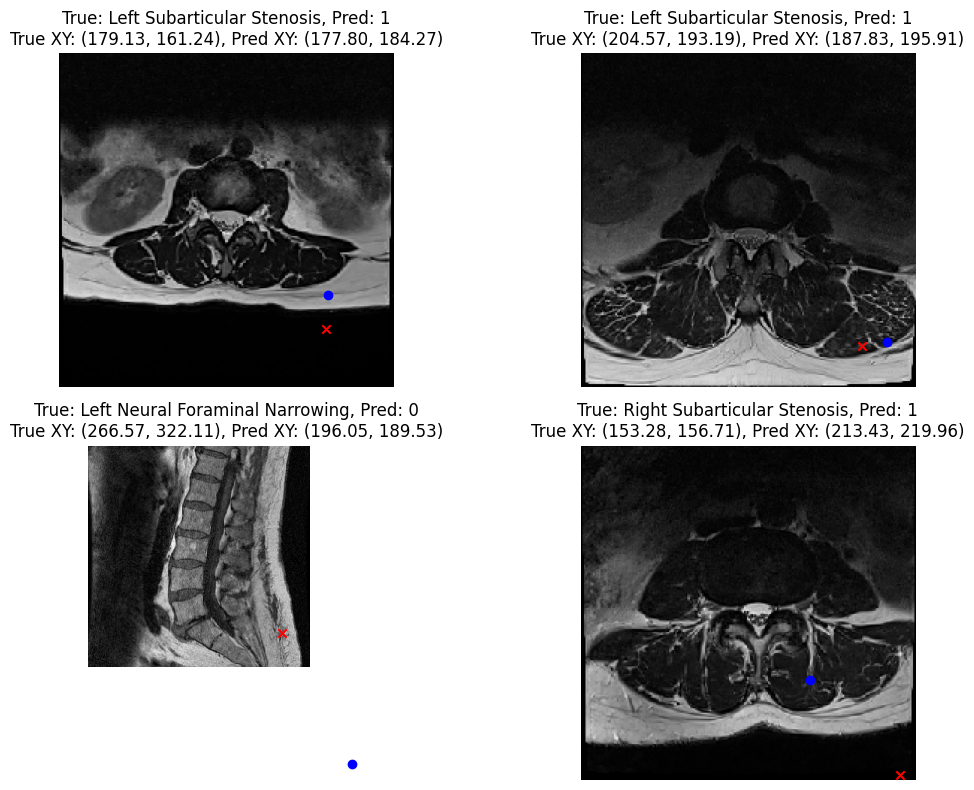

In [76]:
num_examples = 5
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, num_examples//2, i+1)
    
    # Get image and show
    img = X_val[idx]
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    
    # True labels
    true_condition = val_conditions[idx]
    true_condition_level = val_condition_level[idx]
    true_xy = val_xy[idx]
    
    # Predicted labels
    pred_condition = condition_pred_labels[idx]
    pred_condition_level = condition_level_value_pred_labels[idx]
    pred_xy = xy_preds[idx]
    
    plt.title(f"True: {true_condition}, Pred: {pred_condition}\n"
              f"True XY: ({true_xy[0]:.2f}, {true_xy[1]:.2f}), Pred XY: ({pred_xy[0]:.2f}, {pred_xy[1]:.2f})")
    
    # Overlay points
    plt.scatter(pred_xy[0], pred_xy[1], color='red', marker='x', label='Pred XY')
    plt.scatter(true_xy[0], true_xy[1], color='blue', marker='o', label='True XY')

plt.tight_layout()
plt.show()


# Third try****************:

In [87]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
import random

In [88]:
# Load Data
image_paths = df['file_name'].values  # List of image paths
conditions = df['condition'].values  # List of condition labels
xy_labels = df[['x', 'y']].values  # x and y regression labels
condition_level_value = df['condition_level_value'].values  # condition level values

In [89]:
# Split data into train and test sets
train_paths, val_paths, train_conditions, val_conditions, train_xy, val_xy, train_condition_level, val_condition_level = train_test_split(
    image_paths, conditions, xy_labels, condition_level_value, test_size=0.2, random_state=42
)

In [ ]:
# Step 2: Load and preprocess images
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

preprocess_input


In [91]:
# Preprocess images for train and validation sets
X_train = np.vstack([load_and_preprocess_image(img) for img in train_paths])
X_val = np.vstack([load_and_preprocess_image(img) for img in val_paths])

In [92]:
# Encode condition labels
train_conditions_encoded = pd.get_dummies(train_conditions).values
val_conditions_encoded = pd.get_dummies(val_conditions).values

train_condition_level_encoded = pd.get_dummies(train_condition_level).values
val_condition_level_encoded = pd.get_dummies(val_condition_level).values

In [93]:
# Step 3: Build the model
input_image = tf.keras.Input(shape=(224, 224, 3))

backbone = EfficientNetB0(include_top=False, input_tensor=input_image, weights='imagenet')
backbone.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(backbone.output)

condition_output = tf.keras.layers.Dense(train_conditions_encoded.shape[1], activation='softmax', name='condition')(x)
condition_level_value_output = tf.keras.layers.Dense(train_condition_level_encoded.shape[1], activation='softmax', name='condition_level_value')(x)
xy_output = tf.keras.layers.Dense(2, name='xy')(x)

model = tf.keras.Model(inputs=input_image, outputs=[condition_output, condition_level_value_output, xy_output])

In [94]:
# Compile the model
model.compile(
    optimizer='adam',
    loss={'condition': 'categorical_crossentropy', 'condition_level_value': 'categorical_crossentropy', 'xy': 'mean_squared_error'},
    metrics={'condition': 'accuracy', 'condition_level_value': 'accuracy', 'xy': 'mse'}
)

In [ ]:
# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will stop
    restore_best_weights= True  # Restore the weights of the best epoch
)

In [101]:
def find_optimal_batch_size(model, X_test, y_test):
    batch_sizes = [4, 8, 16, 32, 64]
    
    for batch_size in batch_sizes:
        try:
            print(f"\nTesting batch size: {batch_size}")
            # Try a single batch
            model.predict(X_test[:batch_size], batch_size=batch_size)
            print(f"✓ Batch size {batch_size} works")
        except tf.errors.ResourceExhaustedError:
            print(f"✗ Batch size {batch_size} is too large - OOM error")
            break
        except Exception as e:
            print(f"✗ Error with batch size {batch_size}: {str(e)}")
            break

# Test batch sizes
find_optimal_batch_size(model, X_train[:100], val_conditions[:100])


Testing batch size: 4
1/1 [==============================] - 0s 208ms/step
✓ Batch size 4 works

Testing batch size: 8
1/1 [==============================] - 0s 362ms/step
✓ Batch size 8 works

Testing batch size: 16
1/1 [==============================] - 1s 892ms/step
✓ Batch size 16 works

Testing batch size: 32
1/1 [==============================] - 2s 2s/step
✓ Batch size 32 works

Testing batch size: 64
1/1 [==============================] - 3s 3s/step
✓ Batch size 64 works


In [102]:
def clear_memory():
    tf.keras.backend.clear_session()
    import gc
    gc.collect()

In [103]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [104]:
import psutil

class MemoryCallback(tf.keras.callbacks.Callback):
    def on_batch_end(self, batch, logs={}):
        memory = psutil.Process().memory_info().rss / 1024 / 1024  # in MB
        print(f"\rMemory usage: {memory:.2f} MB", end="")

# Add to callbacks
callbacks.append(MemoryCallback())

NameError: name 'callbacks' is not defined

In [ ]:
# Step 4: Train the model
history = model.fit(
    X_train,
    {'condition': train_conditions_encoded, 'condition_level_value': train_condition_level_encoded, 'xy': train_xy},
    validation_data=(X_val, {'condition': val_conditions_encoded, 'condition_level_value': val_condition_level_encoded, 'xy': val_xy}),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
    callbacks.append(MemoryCallback())
)

Epoch 1/20
157/157 [==============================] - 283s 2s/step - loss: 40798.3828 - condition_loss: 0.8038 - condition_level_value_loss: 0.5496 - xy_loss: 40797.0117 - condition_accuracy: 0.5333 - condition_level_value_accuracy: 0.7965 - xy_mse: 40797.0117 - val_loss: 33949.7500 - val_condition_loss: 0.6920 - val_condition_level_value_loss: 0.4609 - val_xy_loss: 33948.5977 - val_condition_accuracy: 0.5582 - val_condition_level_value_accuracy: 0.8278 - val_xy_mse: 33948.5977
Epoch 2/20
157/157 [==============================] - 310s 2s/step - loss: 29398.9277 - condition_loss: 0.6632 - condition_level_value_loss: 0.4825 - xy_loss: 29397.7754 - condition_accuracy: 0.5838 - condition_level_value_accuracy: 0.8055 - xy_mse: 29397.7754 - val_loss: 24164.9355 - val_condition_loss: 0.6567 - val_condition_level_value_loss: 0.4498 - val_xy_loss: 24163.8223 - val_condition_accuracy: 0.5797 - val_condition_level_value_accuracy: 0.8174 - val_xy_mse: 24163.8223
Epoch 3/20
157/157 [==============

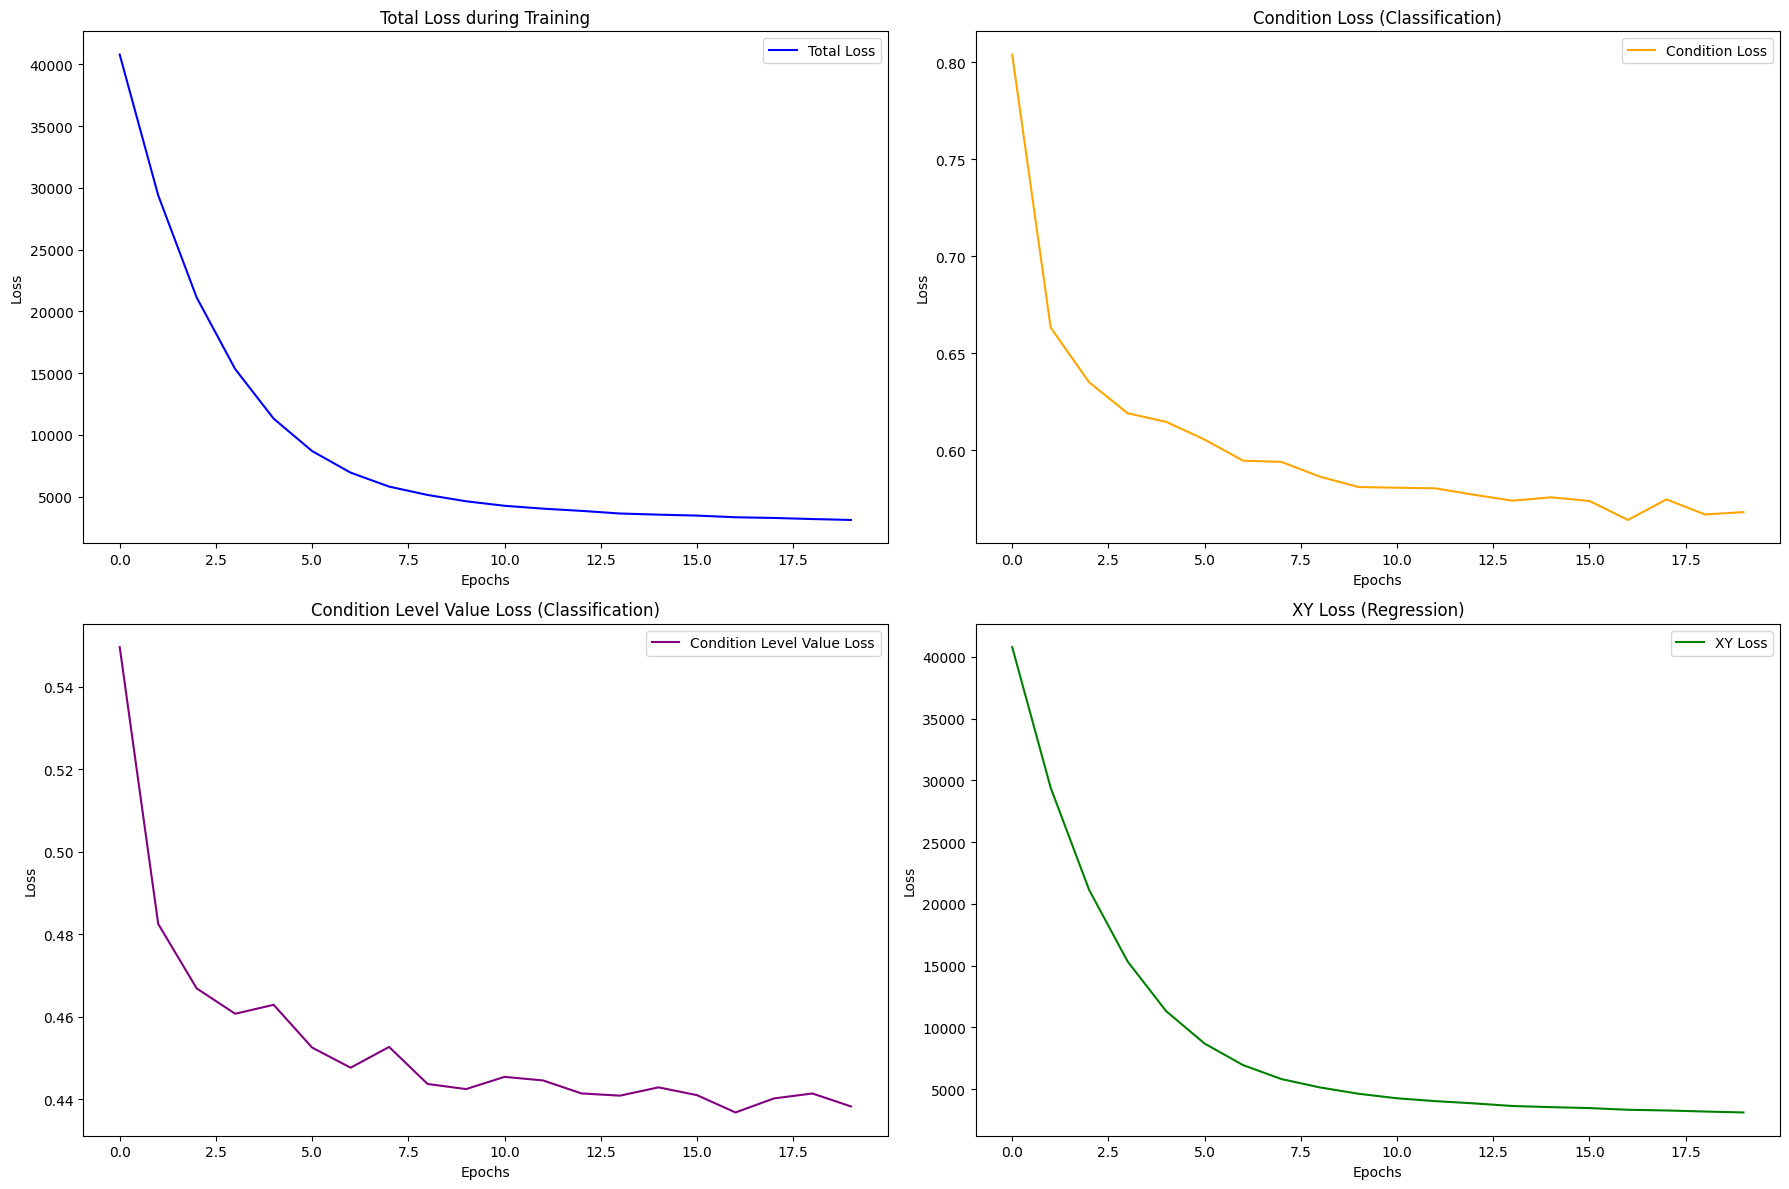

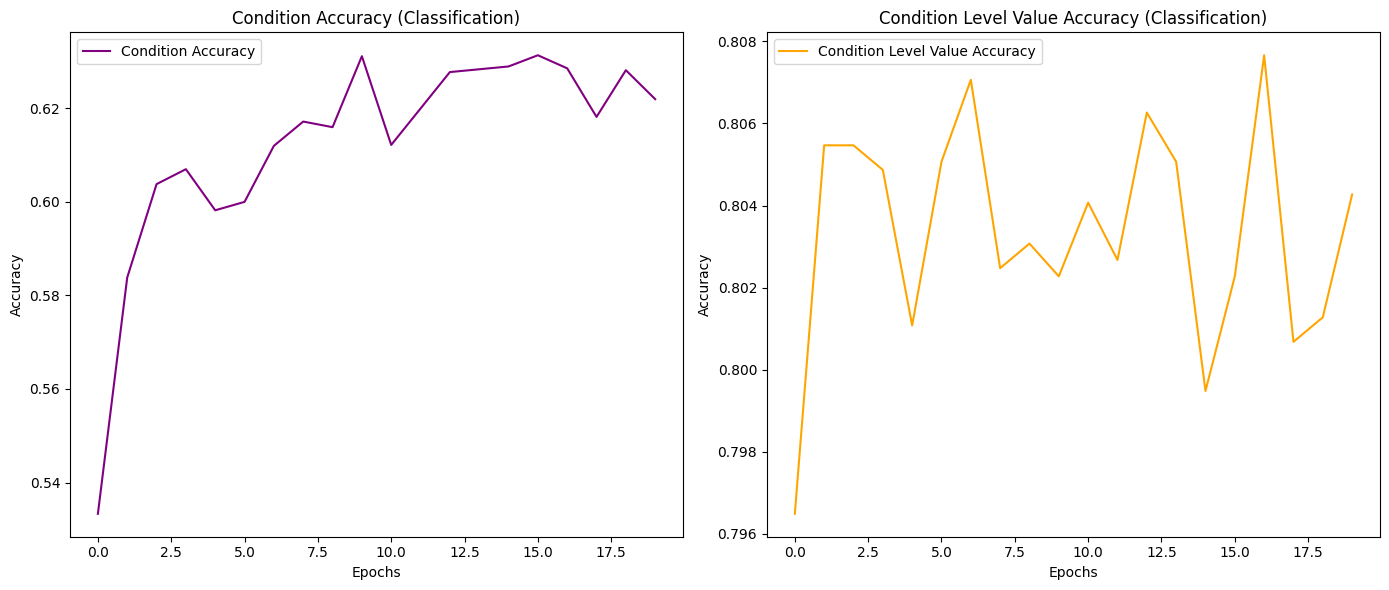

In [96]:
import matplotlib.pyplot as plt

# Plotting each loss and accuracy metric separately
plt.figure(figsize=(18, 12))

# Plot the total loss over epochs
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Total Loss', color='blue')
plt.title('Total Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot condition loss (classification task)
plt.subplot(2, 2, 2)
plt.plot(history.history['condition_loss'], label='Condition Loss', color='orange')
plt.title('Condition Loss (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot condition level value loss (classification task)
plt.subplot(2, 2, 3)
plt.plot(history.history['condition_level_value_loss'], label='Condition Level Value Loss', color='purple')
plt.title('Condition Level Value Loss (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot xy loss (regression task)
plt.subplot(2, 2, 4)
plt.plot(history.history['xy_loss'], label='XY Loss', color='green')
plt.title('XY Loss (Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Accuracy plots for classification tasks
plt.figure(figsize=(14, 6))

# Plot condition accuracy (classification)
plt.subplot(1, 2, 1)
plt.plot(history.history['condition_accuracy'], label='Condition Accuracy', color='purple')
plt.title('Condition Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot condition level value accuracy (classification)
plt.subplot(1, 2, 2)
plt.plot(history.history['condition_level_value_accuracy'], label='Condition Level Value Accuracy', color='orange')
plt.title('Condition Level Value Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [97]:
# Step 6: Evaluate model on validation data
eval_results = model.evaluate(X_val, {'condition': val_conditions_encoded, 'condition_level_value': val_condition_level_encoded, 'xy': val_xy})
print(f"Evaluation on Validation Data: {eval_results}")

40/40 [==============================] - 50s 1s/step - loss: 2979.2288 - condition_loss: 0.6207 - condition_level_value_loss: 0.4620 - xy_loss: 2978.1458 - condition_accuracy: 0.5072 - condition_level_value_accuracy: 0.7783 - xy_mse: 2978.1458
Evaluation on Validation Data: [2979.228759765625, 0.6207013726234436, 0.46203842759132385, 2978.145751953125, 0.5071770548820496, 0.7783094048500061, 2978.145751953125]


In [98]:
# Step 7: Show a few random images with true and predicted labels
num_examples = 4
random_indices = random.sample(range(len(X_val)), num_examples)
predictions = model.predict(X_val)

condition_preds = predictions[0]  # Predicted class probabilities for 'condition'
condition_level_value_preds = predictions[1]  # Predicted class probabilities for 'condition_level_value'
xy_preds = predictions[2]  # Predicted (x, y) values

condition_pred_labels = np.argmax(condition_preds, axis=1)
condition_level_value_pred_labels = np.argmax(condition_level_value_preds, axis=1)



40/40 [==============================] - 57s 1s/step


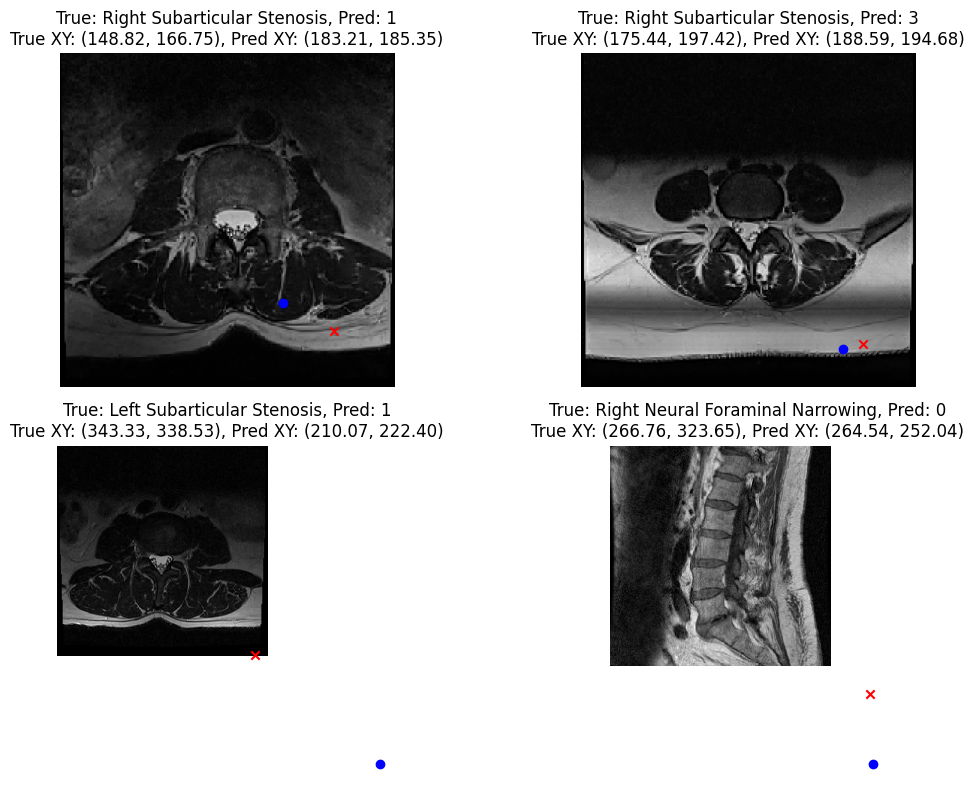

In [99]:
num_examples = 5
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, num_examples//2, i+1)
    
    # Get image and show
    img = X_val[idx]
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    
    # True labels
    true_condition = val_conditions[idx]
    true_condition_level = val_condition_level[idx]
    true_xy = val_xy[idx]
    
    # Predicted labels
    pred_condition = condition_pred_labels[idx]
    pred_condition_level = condition_level_value_pred_labels[idx]
    pred_xy = xy_preds[idx]
    
    plt.title(f"True: {true_condition}, Pred: {pred_condition}\n"
              f"True XY: ({true_xy[0]:.2f}, {true_xy[1]:.2f}), Pred XY: ({pred_xy[0]:.2f}, {pred_xy[1]:.2f})")
    
    # Overlay points
    plt.scatter(pred_xy[0], pred_xy[1], color='red', marker='x', label='Pred XY')
    plt.scatter(true_xy[0], true_xy[1], color='blue', marker='o', label='True XY')

plt.tight_layout()
plt.show()


# Last one:

In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
import random

In [20]:
# Load Data
image_paths = df['file_name'].values  # List of image paths
conditions = df['condition'].values  # List of condition labels
xy_labels = df[['x', 'y']].values  # x and y regression labels
condition_level_value = df['condition_level_value'].values  # condition level values

In [21]:
# Split data into train and test sets
train_paths, val_paths, train_conditions, val_conditions, train_xy, val_xy, train_condition_level, val_condition_level = train_test_split(
    image_paths, conditions, xy_labels, condition_level_value, test_size=0.2, random_state=42
)

In [22]:
# # Step 2: Load and preprocess images
# def load_and_preprocess_image(image_path):
#     img = image.load_img(image_path, target_size=(224, 224))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     return preprocess_input(img_array)

def load_and_preprocess_image(image_path):
    # Load image in grayscale mode
    img = image.load_img(image_path, target_size=(512, 512), color_mode='grayscale')
    
    # Convert to array and normalize
    img_array = image.img_to_array(img)
    
    # Normalize to [0,1] range
    img_array = img_array / 255.0
    
    # Add channel dimension if needed (512, 512) -> (512, 512, 1)
    if len(img_array.shape) == 2:
        img_array = np.expand_dims(img_array, axis=-1)
    
    # Add batch dimension (512, 512, 1) -> (1, 512, 512, 1)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Apply medical image specific preprocessing
    img_array = adjust_contrast(img_array)
    
    return preprocess_input(img_array)


def adjust_contrast(img_array, clip_limit=2.0, tile_grid_size=(8, 8)):
    """Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)"""
    # Convert to uint8 for CLAHE
    img = (img_array[0, ..., 0] * 255).astype(np.uint8)
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_clahe = clahe.apply(img)
    
    # Convert back to float32 and reshape
    img_clahe = img_clahe.astype(np.float32) / 255.0
    img_clahe = np.expand_dims(np.expand_dims(img_clahe, axis=0), axis=-1)
    
    return img_clahe


In [23]:
# Preprocess images for train and validation sets
X_train = np.vstack([load_and_preprocess_image(img) for img in train_paths])
X_val = np.vstack([load_and_preprocess_image(img) for img in val_paths])
input_shape = (512, 512, 1)  # Adjusted for medical images
input_image = tf.keras.Input(shape=input_shape)

In [ ]:
# Model architecture
backbone = EfficientNetB4(include_top=False, input_tensor=input_image, weights='imagenet')
for layer in backbone.layers[:-30]:  # Freeze all except last 30 layers
    layer.trainable = False

# Add attention mechanism
x = backbone.output
attention = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(x)
x = tf.keras.layers.Multiply()([x, attention])

# Pooling combination
avg_pool = tf.keras.layers.GlobalAveragePooling2D()(x)
max_pool = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Concatenate()([avg_pool, max_pool])

# Dense layers with dropout
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.3)(x)

# Output layers
condition_output = tf.keras.layers.Dense(train_conditions_encoded.shape[1], activation='softmax', name='condition')(x)
condition_level_value_output = tf.keras.layers.Dense(train_condition_level_encoded.shape[1], activation='softmax', name='condition_level_value')(x)
xy_output = tf.keras.layers.Dense(2, name='xy')(x)



In [ ]:
model = tf.keras.Model(inputs=input_image, outputs=[condition_output, condition_level_value_output, xy_output])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Custom learning rate scheduler
initial_learning_rate = 1e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9
)



In [ ]:
# Compile with custom loss weights
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss={
        'condition': 'categorical_crossentropy',
        'condition_level_value': 'categorical_crossentropy',
        'xy': 'mse'
    },
    loss_weights={'condition': 1.0, 'condition_level_value': 0.8, 'xy': 0.5},
    metrics=['accuracy']
)



In [ ]:
# Data augmentation for medical images
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
#     tf.keras.layers.RandomBrightness(0.1),
#     tf.keras.layers.GaussianNoise(0.1)
# ])

In [ ]:
# Training with larger batch size
history = model.fit(
    #data_augmentation(X_train),
    X_train,
    {'condition': train_conditions_encoded, 
     'condition_level_value': train_condition_level_encoded, 
     'xy': train_xy},
    validation_data=(X_val, {
        'condition': val_conditions_encoded,
        'condition_level_value': val_condition_level_encoded,
        'xy': val_xy
    }),
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    class_weight={'condition': compute_class_weights(train_conditions_encoded)}
)


In [ ]:
import matplotlib.pyplot as plt

# Plotting each loss and accuracy metric separately
plt.figure(figsize=(18, 12))

# Plot the total loss over epochs
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Total Loss', color='blue')
plt.title('Total Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot condition loss (classification task)
plt.subplot(2, 2, 2)
plt.plot(history.history['condition_loss'], label='Condition Loss', color='orange')
plt.title('Condition Loss (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot condition level value loss (classification task)
plt.subplot(2, 2, 3)
plt.plot(history.history['condition_level_value_loss'], label='Condition Level Value Loss', color='purple')
plt.title('Condition Level Value Loss (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot xy loss (regression task)
plt.subplot(2, 2, 4)
plt.plot(history.history['xy_loss'], label='XY Loss', color='green')
plt.title('XY Loss (Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Accuracy plots for classification tasks
plt.figure(figsize=(14, 6))

# Plot condition accuracy (classification)
plt.subplot(1, 2, 1)
plt.plot(history.history['condition_accuracy'], label='Condition Accuracy', color='purple')
plt.title('Condition Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot condition level value accuracy (classification)
plt.subplot(1, 2, 2)
plt.plot(history.history['condition_level_value_accuracy'], label='Condition Level Value Accuracy', color='orange')
plt.title('Condition Level Value Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Step 6: Evaluate model on validation data
eval_results = model.evaluate(X_val, {'condition': val_conditions_encoded, 'condition_level_value': val_condition_level_encoded, 'xy': val_xy})
print(f"Evaluation on Validation Data: {eval_results}")

In [ ]:
# Step 7: Show a few random images with true and predicted labels
num_examples = 4
random_indices = random.sample(range(len(X_val)), num_examples)
predictions = model.predict(X_val)

condition_preds = predictions[0]  # Predicted class probabilities for 'condition'
condition_level_value_preds = predictions[1]  # Predicted class probabilities for 'condition_level_value'
xy_preds = predictions[2]  # Predicted (x, y) values

condition_pred_labels = np.argmax(condition_preds, axis=1)
condition_level_value_pred_labels = np.argmax(condition_level_value_preds, axis=1)



In [ ]:
num_examples = 5
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, num_examples//2, i+1)
    
    # Get image and show
    img = X_val[idx]
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    
    # True labels
    true_condition = val_conditions[idx]
    true_condition_level = val_condition_level[idx]
    true_xy = val_xy[idx]
    
    # Predicted labels
    pred_condition = condition_pred_labels[idx]
    pred_condition_level = condition_level_value_pred_labels[idx]
    pred_xy = xy_preds[idx]
    
    plt.title(f"True: {true_condition}, Pred: {pred_condition}\n"
              f"True XY: ({true_xy[0]:.2f}, {true_xy[1]:.2f}), Pred XY: ({pred_xy[0]:.2f}, {pred_xy[1]:.2f})")
    
    # Overlay points
    plt.scatter(pred_xy[0], pred_xy[1], color='red', marker='x', label='Pred XY')
    plt.scatter(true_xy[0], true_xy[1], color='blue', marker='o', label='True XY')

plt.tight_layout()
plt.show()


# one more:

In [3]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_12_0_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_12_0_x86_64.whl (56.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import random

In [6]:
df_path = '/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/metadata.csv'
df = pd.read_csv(df_path)

In [7]:
# Load Data
image_paths = df['file_name'].values  # List of image paths
conditions = df['condition'].values  # List of condition labels
xy_labels = df[['x', 'y']].values  # x and y regression labels
condition_level_value = df['condition_level_value'].values  # condition level values

In [8]:
# Split data into train and test sets
train_paths, val_paths, train_conditions, val_conditions, train_xy, val_xy, train_condition_level, val_condition_level = train_test_split(
    image_paths, conditions, xy_labels, condition_level_value, test_size=0.2, random_state=42
)

In [10]:
'''Key changes made:
1. Changed target size to 512x512
2. Set color_mode to 'grayscale'
3. Added medical image-specific preprocessing (CLAHE)
4. Implemented memory-efficient batch loading
5. Added tf.data pipeline for efficient training
6. Added medical image-specific augmentations
7. Normalized pixel values to [0,1] range
8. Added proper channel dimension handling
'''
def load_and_preprocess_image(image_path):
    # Load image in grayscale mode
    img = image.load_img(image_path, target_size=(512, 512), color_mode='grayscale')
    
    # Convert to array and normalize
    img_array = image.img_to_array(img)
    
    # Normalize to [0,1] range
    img_array = img_array / 255.0
    
    # Add channel dimension if needed (512, 512) -> (512, 512, 1)
    if len(img_array.shape) == 2:
        img_array = np.expand_dims(img_array, axis=-1)
    
    # Add batch dimension (512, 512, 1) -> (1, 512, 512, 1)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Apply medical image specific preprocessing
    img_array = adjust_contrast(img_array)
    
    return img_array

def adjust_contrast(img_array, clip_limit=2.0, tile_grid_size=(8, 8)):
    """Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)"""
    # Convert to uint8 for CLAHE
    img = (img_array[0, ..., 0] * 255).astype(np.uint8)
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_clahe = clahe.apply(img)
    
    # Convert back to float32 and reshape
    img_clahe = img_clahe.astype(np.float32) / 255.0
    img_clahe = np.expand_dims(np.expand_dims(img_clahe, axis=0), axis=-1)
    
    return img_clahe

# Memory-efficient loading using generators
def create_dataset(image_paths, batch_size=32):
    n = len(image_paths)
    for i in range(0, n, batch_size):
        batch_paths = image_paths[i:min(i + batch_size, n)]
        batch_images = np.vstack([load_and_preprocess_image(img) for img in batch_paths])
        yield batch_images

# Load data in batches to prevent memory overflow
X_train = np.zeros((len(train_paths), 512, 512, 1), dtype=np.float32)
X_val = np.zeros((len(val_paths), 512, 512, 1), dtype=np.float32)

# Load training data
for i, batch in enumerate(create_dataset(train_paths, batch_size=32)):
    start_idx = i * 32
    end_idx = min(start_idx + batch.shape[0], len(train_paths))
    X_train[start_idx:end_idx] = batch

# Load validation data
for i, batch in enumerate(create_dataset(val_paths, batch_size=32)):
    start_idx = i * 32
    end_idx = min(start_idx + batch.shape[0], len(val_paths))
    X_val[start_idx:end_idx] = batch

# # Optional: Add data augmentation pipeline
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
#     tf.keras.layers.GaussianNoise(0.03),
#     # Medical image specific augmentations
#     tf.keras.layers.RandomBrightness(0.1),
#     tf.keras.layers.RandomContrast(0.1),
# ])


In [ ]:
# Preprocess images for train and validation sets
X_train = np.vstack([load_and_preprocess_image(img) for img in train_paths])
X_val = np.vstack([load_and_preprocess_image(img) for img in val_paths])
input_shape = (512, 512, 1)  # Adjusted for medical images
input_image = tf.keras.Input(shape=input_shape)

In [26]:
# Encode condition labels
train_conditions_encoded = pd.get_dummies(train_conditions).values
val_conditions_encoded = pd.get_dummies(val_conditions).values

train_condition_level_encoded = pd.get_dummies(train_condition_level).values
val_condition_level_encoded = pd.get_dummies(val_condition_level).values

In [28]:
# Multi-output model: Classification (condition), Classification (condition_level_value), and Regression (x, y)
condition_output = tf.keras.layers.Dense(train_conditions_encoded.shape[1], activation='softmax', name='condition')(x)
condition_level_value_output = tf.keras.layers.Dense(train_condition_level_encoded.shape[1], activation='softmax', name='condition_level_value')(x)  # New output
xy_output = tf.keras.layers.Dense(2, name='xy')(x)  # Two outputs for x and y

NameError: name 'x' is not defined

In [16]:
import psutil
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
# First define the MemoryCallback class
class MemoryCallback(tf.keras.callbacks.Callback):
    def on_batch_end(self, batch, logs={}):
        memory = psutil.Process().memory_info().rss / 1024 / 1024  # in MB
        print(f"\rMemory usage: {memory:.2f} MB", end="")

# Then create your callbacks list
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
    MemoryCallback()
]

In [11]:
# Encode condition labels
train_conditions_encoded = pd.get_dummies(train_conditions).values
val_conditions_encoded = pd.get_dummies(val_conditions).values

train_condition_level_encoded = pd.get_dummies(train_condition_level).values
val_condition_level_encoded = pd.get_dummies(val_condition_level).values

# Create tf.data.Dataset for efficient training
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 16  # Adjust based on the memory constraints

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, {
    'condition': train_conditions_encoded,
    'condition_level_value': train_condition_level_encoded,
    'xy': train_xy
}))

train_dataset = (
    train_dataset
    .cache()
    .shuffle(1000)
    .batch(BATCH_SIZE)
    #.map(lambda x, y: (data_augmentation(x, training=True), y), 
    #     num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, {
    'condition': val_conditions_encoded,
    'condition_level_value': val_condition_level_encoded,
    'xy': val_xy
})).batch(BATCH_SIZE).prefetch(AUTOTUNE)

2024-11-12 21:53:23.438663: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model = tf.keras.Model(inputs=input_image, outputs=[condition_output, condition_level_value_output, xy_output])

NameError: name 'condition_output' is not defined

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Custom learning rate scheduler
initial_learning_rate = 1e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9
)



In [ ]:
# Compile with custom loss weights
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss={
        'condition': 'categorical_crossentropy',
        'condition_level_value': 'categorical_crossentropy',
        'xy': 'mse'
    },
    loss_weights={'condition': 1.0, 'condition_level_value': 0.8, 'xy': 0.5},
    metrics=['accuracy']
)



In [17]:
# Usage in model.fit()
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

NameError: name 'model' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Plotting each loss and accuracy metric separately
plt.figure(figsize=(18, 12))

# Plot the total loss over epochs
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Total Loss', color='blue')
plt.title('Total Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot condition loss (classification task)
plt.subplot(2, 2, 2)
plt.plot(history.history['condition_loss'], label='Condition Loss', color='orange')
plt.title('Condition Loss (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot condition level value loss (classification task)
plt.subplot(2, 2, 3)
plt.plot(history.history['condition_level_value_loss'], label='Condition Level Value Loss', color='purple')
plt.title('Condition Level Value Loss (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot xy loss (regression task)
plt.subplot(2, 2, 4)
plt.plot(history.history['xy_loss'], label='XY Loss', color='green')
plt.title('XY Loss (Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Accuracy plots for classification tasks
plt.figure(figsize=(14, 6))

# Plot condition accuracy (classification)
plt.subplot(1, 2, 1)
plt.plot(history.history['condition_accuracy'], label='Condition Accuracy', color='purple')
plt.title('Condition Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot condition level value accuracy (classification)
plt.subplot(1, 2, 2)
plt.plot(history.history['condition_level_value_accuracy'], label='Condition Level Value Accuracy', color='orange')
plt.title('Condition Level Value Accuracy (Classification)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Step 6: Evaluate model on validation data
eval_results = model.evaluate(X_val, {'condition': val_conditions_encoded, 'condition_level_value': val_condition_level_encoded, 'xy': val_xy})
print(f"Evaluation on Validation Data: {eval_results}")

In [ ]:
# Step 7: Show a few random images with true and predicted labels
num_examples = 4
random_indices = random.sample(range(len(X_val)), num_examples)
predictions = model.predict(X_val)

condition_preds = predictions[0]  # Predicted class probabilities for 'condition'
condition_level_value_preds = predictions[1]  # Predicted class probabilities for 'condition_level_value'
xy_preds = predictions[2]  # Predicted (x, y) values

condition_pred_labels = np.argmax(condition_preds, axis=1)
condition_level_value_pred_labels = np.argmax(condition_level_value_preds, axis=1)



In [ ]:
num_examples = 5
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, num_examples//2, i+1)
    
    # Get image and show
    img = X_val[idx]
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    
    # True labels
    true_condition = val_conditions[idx]
    true_condition_level = val_condition_level[idx]
    true_xy = val_xy[idx]
    
    # Predicted labels
    pred_condition = condition_pred_labels[idx]
    pred_condition_level = condition_level_value_pred_labels[idx]
    pred_xy = xy_preds[idx]
    
    plt.title(f"True: {true_condition}, Pred: {pred_condition}\n"
              f"True XY: ({true_xy[0]:.2f}, {true_xy[1]:.2f}), Pred XY: ({pred_xy[0]:.2f}, {pred_xy[1]:.2f})")
    
    # Overlay points
    plt.scatter(pred_xy[0], pred_xy[1], color='red', marker='x', label='Pred XY')
    plt.scatter(true_xy[0], true_xy[1], color='blue', marker='o', label='True XY')

plt.tight_layout()
plt.show()
